In [224]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

DEFAULT_RANDOM_SEED = 2021
def seedBasic(seed=DEFAULT_RANDOM_SEED):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

plt.style.use('bmh')
df = pd.read_csv('insurance.csv')

# Exploration du dataset

## Valeurs nulles

In [225]:
#Check empty values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


On voit qu'aucune donn√©e n'est manquante dans le jeu de donn√©es.
Il nous faudra voir si toutes les donn√©es sont pertinentes, mais pour le moment, nous n'avons pas √† en supprimer.

## Cast des donn√©es de certaines colonnes

Afin de pouvoir analyser des donn√©es sous formes d'histogrammes, nous allons devoir transformer les donn√©es textuelles en int.
Il s'agit de "sex", "smoker" et "region". 
sex_male : male -> 1 et female -> 0
smoker_yes : no -> 0 et yes -> 1
region =>nsouthwest -> 0, southeast -> 1, northwest -> 2, northeast -> 3

In [226]:
#Parse string to int
df['sex'] = df['sex'].replace({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})
df['region'] = df['region'].replace({'southwest': 0, 'southeast': 1, 'northwest':2, 'northeast':3})

## Boxplots

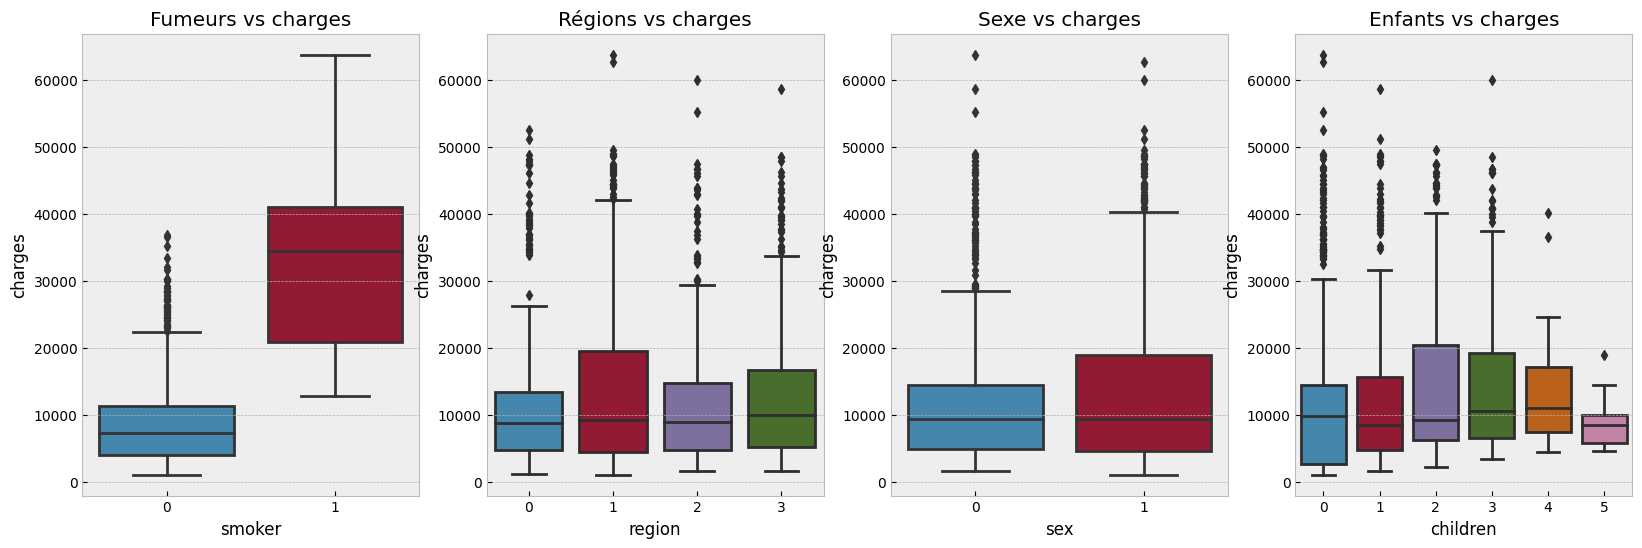

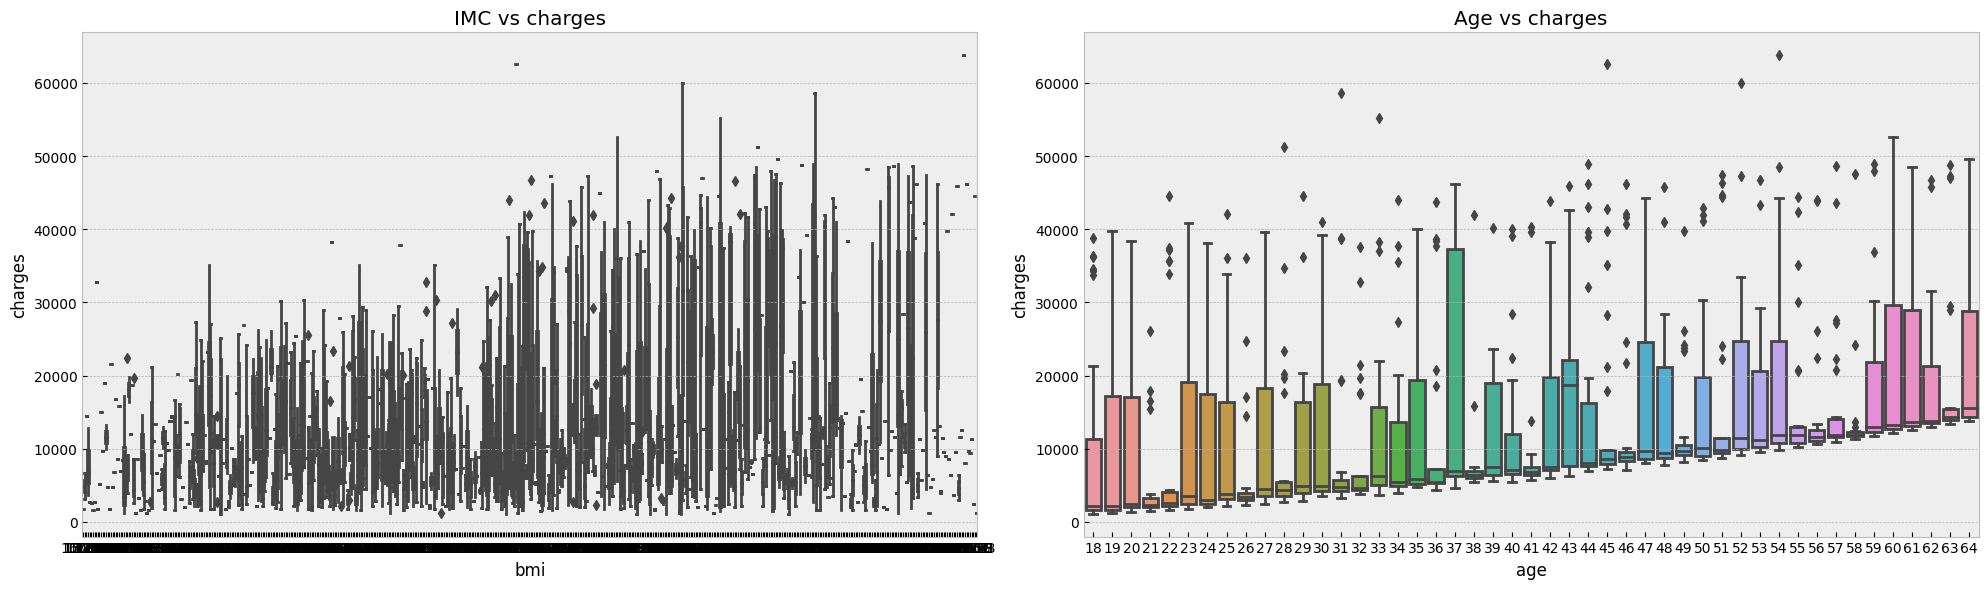

In [227]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

sns.boxplot(x='smoker', y='charges', data=df, ax=axes[0])
axes[0].set_title('Fumeurs vs charges')
df.groupby('smoker').agg(['mean','min','max'])['charges']

sns.boxplot(x='region', y='charges', data=df, ax=axes[1])
axes[1].set_title('R√©gions vs charges')
df.groupby('region').agg(['mean','min','max'])['charges']

sns.boxplot(x='sex', y='charges', data=df, ax=axes[2])
axes[2].set_title('Sexe vs charges')
df.groupby('sex').agg(['mean','min','max'])['charges']

sns.boxplot(x='children', y='charges', data=df, ax=axes[3])
axes[3].set_title('Enfants vs charges')
df.groupby('children').agg(['mean','min','max'])['charges']

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.boxplot(x='bmi', y='charges', data=df, ax=axes[0])
axes[0].set_title('IMC vs charges')
df.groupby('bmi').agg(['mean','min','max'])['charges']

sns.boxplot(x='age', y='charges', data=df, ax=axes[1])
axes[1].set_title('Age vs charges')
df.groupby('age').agg(['mean','min','max'])['charges']


plt.tight_layout()

La m√©diane des charges des non-fumeurs est tr√®s largement inf√©rieure √† celles des fumeurs. Ce boxplot nous indique donc que les deux groupes ont des distributions de charges diff√©rentes, sans pour autant impliquer que le tabagisme est la cause de cette diff√©rence. En effet, il est possible que d'autres facteurs tels que l'√¢ge, le sexe, le r√©gime alimentaire ou les ant√©c√©dents m√©dicaux puissent influencer les niveaux de charges dans les deux groupes.

Pour le nombre d'enfants, on observe une augmentation de la valeur maximale de 0 √† 2 enfants puis une diminution flagrante de 2 √† 5 enfants. Cette diff√©rence s'explique s√ªrement par un accompagnement plus important des familles ayant plus d'enfants sans lequel les co√ªts seraient trop √©lev√©s.

La m√©diane des charges m√©dicales pay√©es pour chaque r√©gion est la m√™me. On remarque n√©anmoins des diff√©rences de 

La m√©diane de charges m√©dicales pay√©es pour le sexe f√©minin et masculin est la m√™me.

Le boxplot de l'IMC n'est pas tr√®s lisible mais nous pouvons penser observer que plus il est √©lev√©, plus les co√ªts m√©dicaux sont √©lev√©s.

On voit sur le boxplot de l'√¢ge que plus celui-ci augmente, plus la valeur min et la m√©diane des frais m√©dicaux sont √©lev√©es. Les diff√©rences observ√©es en termes de 3√®me quartile et de valeur max sont tr√®s problablement d√ªes √† d'autres facteurs qui influencent les charges.

Nous n'avons remarqu√© aucune valeur de colonnes aberrantes mis √† part pour "Charges". Cependant, il nous semble possible que certaines personnes aient des frais m√©dicaux anormalements √©lev√©s dans le cas de maladies graves par exemple.

## Pairplots

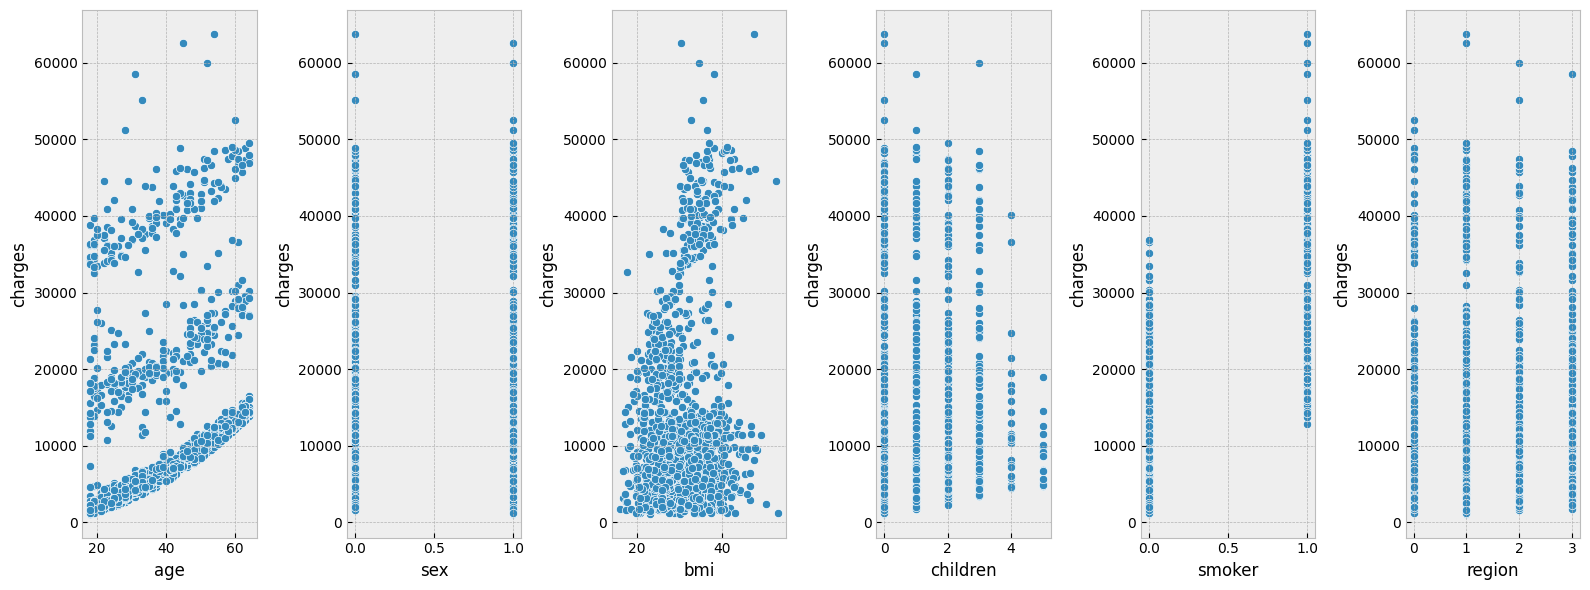

In [228]:
fig, axes = plt.subplots(1, 6, figsize=(16, 6))

sns.scatterplot(data=df, x='age', y='charges', ax=axes[0])
sns.scatterplot(data=df, x='sex', y='charges', ax=axes[1])
sns.scatterplot(data=df, x='bmi', y='charges', ax=axes[2])
sns.scatterplot(data=df, x='children', y='charges', ax=axes[3])
sns.scatterplot(data=df, x='smoker', y='charges', ax=axes[4])
sns.scatterplot(data=df, x='region', y='charges', ax=axes[5])

plt.tight_layout()

Nous avons pu observer les m√™mes r√©sultats que sur les boxplots pr√©c√©dents avec une autre visualisation

## Corr√©lations

<Axes: >

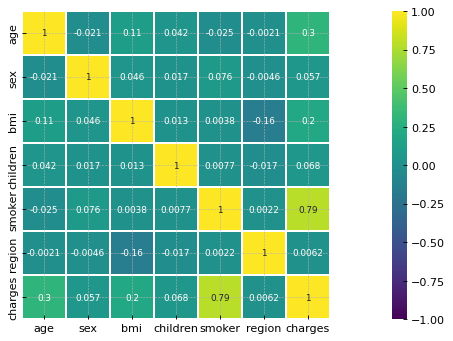

In [229]:
corr = df.corr()  # We already examined Charges correlations
plt.figure(figsize=(20, 5), dpi=80)

sns.heatmap(corr,
            cmap='viridis',
            vmax=1.0,
            vmin=-1.0,
            linewidths=0.1,
            annot=True,
            annot_kws={"size": 8},
            square=True)

On peut remarquer qu'il y a 4 valeurs peu corr√©l√©es avec les charges, 1 moyenne corr√©l√©e et 1 fortement corr√©l√©e : <br>
smoker      0.787251 <br>
age         0.299008 <br>
bmi         0.198341 <br>
children    0.067998 <br>
sex         0.057292 <br>
region      0.006208 <br>

Les autres colonnes sont peu corr√©l√©es entre elles. Les corr√©lations les plus √©lev√©es sont :<br>
BMI - region : 0.16<br>
BMI - age : 0.11<br>

## Split du jeu de donn√©es en jeu d'entra√Ænement et de test

Nous allons d√©buter par diviser notre jeu de donn√©es en un jeu d'entra√Ænement et un jeu de tests.
30% des donn√©es seront de test, et 70% seront d'entra√Ænement.<br>
Le random_state nous garantie que les m√™mes jeux de donn√©es sont obtenues √† chaque ex√©cution du code. C'est particuli√®rement important pour la reproductibilit√© des r√©sultats dans les exp√©riences de machine learning. Nous l'avons fix√© arbitrairement √† 2021.

In [230]:
X = df.drop(['charges'], axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=2021)

X_train: DataFrame contenant les donn√©es d'entra√Ænement pour les variables explicatives (toutes les colonnes de 'df' √† l'exception de 'charges').<br>
y_train: une s√©rie contenant les donn√©es d'entra√Ænement pour la variable cible (la colonne 'charges').<br>
X_test: un DataFrame contenant les donn√©es de test pour les variables explicatives.<br>
y_test: une s√©rie contenant les donn√©es de test pour la variable cible.<br>

Nous allons maintenant entra√Æner un mod√®le √† trouver un lien entre y_train (sorties) et X_train (entr√©es)

# Entra√Ænement

Nous commen√ßons par effectuer une mise √† l'√©chelle des jeux de donn√©es X, afin de ne pas cr√©er d'in√©quit√©s entre les grandes et les petites valeurs

In [231]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Construction des mod√®les


Nous d√©butons par le mod√®le de r√©gression lin√©aire car c'est l'une des m√©thodes de r√©gression les plus simples. L'un de ses principaux avantages est la facilit√© d'interpr√©tation des r√©sultats.

### Mod√®le de r√©gression lin√©aire

In [232]:
#Cr√©ation d'un objet modeleRegressionLineaire de r√©gression lin√©aire
modeleRegressionLineaire = LinearRegression()

#Entra√Ænement du mod√®le sur les donn√©es d'entra√Ænement
#Pour obtenir les meilleures pond√©rations, une minimisation de la somme des carr√©s des r√©sidus (SSR) sera cherch√©e, pour toutes les observations.
modeleRegressionLineaire.fit(X_train_scaled, y_train)

LinearRegression()

### Mod√®le de r√©gression lasso

Afin de choisir le meilleur hyperparam√®tre alpha, nous allons effectuer une "K Fold Cross-Validation"

In [233]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso

kf = KFold(n_splits=10, shuffle=True)

#Valeurs de alpha √† tester
alphas = [0.001, 0.01, 0.1, 1, 5, 10, 50, 75, 100, 500, 1000]
scores = []

for alpha in alphas:
    alpha_scores = []
    #K Fold cross validation : chacun des 10 plis sera jeu de validation
    for train_index, val_index in kf.split(X_train_scaled, y_train):

        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_fold, y_val_fold = y_train.values[train_index], y_train.values[val_index]
       
        #Cr√©ation d'un objet modeleRegressionLasso de r√©gression Lasso
        modeleRegressionLasso = Lasso(alpha=alpha)
        modeleRegressionLasso.fit(X_train_fold, y_train_fold)
        score = modeleRegressionLasso.score(X_val_fold, y_val_fold)
        alpha_scores.append(score)

    # Calculer la moyenne des scores de validation
    mean_score = np.mean(alpha_scores)
    scores.append(mean_score)

# Trouver l'alpha qui donne le meilleur score de validation
best_alpha_lasso = alphas[np.argmax(scores)]   
print("Pour Lasso, le meilleur alpha est : ",best_alpha_lasso, "Le score est ", max(scores))

# Nouvel entrainement avec le meilleur alpha
del modeleRegressionLasso
modeleRegressionLasso = Lasso(alpha=best_alpha_lasso)
modeleRegressionLasso.fit(X_train_scaled, y_train)

Pour Lasso, le meilleur alpha est :  100 Le score est  0.7393874978697114


Lasso(alpha=100)

Nous avons observ√© que le meilleur alpha varie beaucoup d'une ex√©cution √† l'autre, et que le score max est approximativement le m√™me (0.74). On peut imaginer que la r√©gularisation n'a pas d'impact.

### Mod√®le de r√©gression ridge

Nous allons utiliser les jeux d'entra√Ænement mis √† l'√©chelle, et effectuer une "K Fold Cross-Validation"

In [234]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso

kf = KFold(n_splits=10, shuffle=True)

#Valeurs de alpha √† tester
alphas = [0.001, 0.01, 0.1, 1, 5, 10, 50, 75, 100, 500, 1000]
scores = []

for alpha in alphas:
    # Initialiser une liste pour stocker les scores de validation pour ce mod√®le
    alpha_scores = []
    # Parcourir les diff√©rentes it√©rations de la validation crois√©e
    for train_index, val_index in kf.split(X_train_scaled, y_train):
        # Extraire les donn√©es d'entra√Ænement et de validation pour cette it√©ration

        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_fold, y_val_fold = y_train.values[train_index], y_train.values[val_index]
       
        # Cr√©er un mod√®le Ridge avec l'alpha actuel et entra√Æner le mod√®le sur les donn√©es d'entra√Ænement
        modeleRegressionLineaireRidge = Ridge(alpha=alpha)
        modeleRegressionLineaireRidge.fit(X_train_fold, y_train_fold)
        # Calculer le score de validation pour ce mod√®le et l'ajouter √† la liste des scores pour cette alpha
        score = modeleRegressionLineaireRidge.score(X_val_fold, y_val_fold)
        alpha_scores.append(score)
    # Calculer la moyenne des scores de validation pour ce mod√®le et l'ajouter √† la liste des scores pour tous les alphas
    mean_score = np.mean(alpha_scores)
    scores.append(mean_score)

# Trouver l'alpha qui donne le meilleur score de validation
best_alpha_ridge = alphas[np.argmax(scores)]
print("Pour Ridge, le meilleur alpha est : ",best_alpha_ridge, "Le score est ", max(scores))

# Nouvel entrainement avec le meilleur alpha
del modeleRegressionLineaireRidge
modeleRegressionLineaireRidge = Ridge(alpha=best_alpha_ridge)
modeleRegressionLineaireRidge.fit(X_train_scaled, y_train)

Pour Ridge, le meilleur alpha est :  0.1 Le score est  0.7386654952027769


Ridge(alpha=0.1)

### Mod√®le de r√©gression lin√©aire/ridge polynome

Nous avons essay√© de r√©aliser une r√©gression lin√©aire avec un polynome de degr√© autre que 1, sans r√©gularisation, mais nous avons obtenu des coefficients extr√™mement grands. Cela peut faire r√©f√©rence √† du sur-apprentissage. Nous allons donc r√©gulariser via une Ridge Regression au lieu d'une R√©gression lin√©aire afin de restreindre les coefficients. En utilisant RidgeCV, une K Fold Cross Validation sera effectu√©e automatiquement sous la forme d'un "leave-one-out cross-validation", c'est-√†-dire qu'il y aura autant de plis que de points dans le dataset.

In [235]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, RidgeCV

kf = KFold(n_splits=6, shuffle=True)

degrees = [1,2,3,4,5,6]
alphas = [0.001, 0.01, 0.1, 1, 5, 10, 50, 75, 100, 500, 1000]
scores = []

for degree in degrees:

    degree_scores = []
    poly = PolynomialFeatures(degree=degree)

    for train_index, val_index in kf.split(X_train_scaled, y_train):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_fold, y_val_fold = y_train.values[train_index], y_train.values[val_index]

        X_poly_scaled = poly.fit_transform(X_train_fold)
        #Ajout d'une colonne de biais
        X_poly_scaled = np.hstack((np.ones((X_poly_scaled.shape[0], 1)), X_poly_scaled))

        modeleRegressionPolynomiale = RidgeCV(alphas)
        modeleRegressionPolynomiale.fit(X_poly_scaled, y_train_fold)

        X_poly_scaled_val = poly.transform(X_val_fold) #Transformer X_val_fold en polyn√¥me
        X_poly_scaled_val = np.hstack((np.ones((X_poly_scaled_val.shape[0], 1)), X_poly_scaled_val)) # Ajouter une colonne de biais

        score = modeleRegressionPolynomiale.score(X_poly_scaled_val, y_val_fold) # Calculer le score sur X_val_fold transform√© en polyn√¥me
        degree_scores.append(score)
    
    mean_score = np.mean(degree_scores)
    scores.append(mean_score)

# Trouver le degr√© qui donne le meilleur score de validation
best_degree_polynomial_regression = degrees[np.argmax(scores)]   
print("Pour R√©gression polynomiale, le meilleur degr√© est : ",best_degree_polynomial_regression)

# Nouvel entrainement avec le meilleur degr√©
del poly
poly = PolynomialFeatures(degree=best_degree_polynomial_regression)
X_poly_scaled = poly.fit_transform(X_train_scaled)
X_poly_scaled = np.hstack((np.ones((X_poly_scaled.shape[0], 1)), X_poly_scaled))
modeleRegressionPolynomiale = RidgeCV(alphas=alphas)
modeleRegressionPolynomiale.fit(X_train_scaled, y_train)
meilleur_alpha = modeleRegressionPolynomiale.alpha_

# Entra√Æner le mod√®le avec le meilleur alpha
modeleRegressionPolynomiale_final = Ridge(alpha=meilleur_alpha)
modeleRegressionPolynomiale.fit(X_poly_scaled, y_train)

Pour R√©gression polynomiale, le meilleur degr√© est :  2


RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 5, 10, 50, 75, 100, 500, 1000])

### Mod√®le Random Forest

In [236]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

nbTrees = 100

# instantiate the regressor 
rfr = RandomForestRegressor(n_estimators=nbTrees, random_state=0)

# fit the model
rfr.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=0)

### Ce que disent les mod√®les


In [237]:
for idx, col_name in enumerate(X_train.columns):
    print("Coefficients Betas de {} =>\n[regression Lin√©aire] {} \n[regression Lasso alpha = {}] {}\n[regression Ridge alpha = {}] {} \n[regression Ridge polynome degr√© = {}] {}\n".format(
        col_name, modeleRegressionLineaire.coef_[idx], best_alpha_lasso, modeleRegressionLasso.coef_[idx],best_alpha_ridge,modeleRegressionLineaireRidge.coef_[idx], best_degree_polynomial_regression, modeleRegressionPolynomiale.coef_[idx]))

Coefficients Betas de age =>
[regression Lin√©aire] 3319.906630471436 
[regression Lasso alpha = 100] 3229.8729562098983
[regression Ridge alpha = 0.1] 3319.5346182949124 
[regression Ridge polynome degr√© = 2] 0.0

Coefficients Betas de sex =>
[regression Lin√©aire] -114.56407872892441 
[regression Lasso alpha = 100] -0.0
[regression Ridge alpha = 0.1] -114.4755601207228 
[regression Ridge polynome degr√© = 2] 0.0

Coefficients Betas de bmi =>
[regression Lin√©aire] 2163.9333875205075 
[regression Lasso alpha = 100] 2048.6240411778886
[regression Ridge alpha = 0.1] 2163.716151769011 
[regression Ridge polynome degr√© = 2] 3525.5028371734707

Coefficients Betas de children =>
[regression Lin√©aire] 827.0786426825136 
[regression Lasso alpha = 100] 728.7349531362855
[regression Ridge alpha = 0.1] 827.0018208191502 
[regression Ridge polynome degr√© = 2] -242.6998762973946

Coefficients Betas de smoker =>
[regression Lin√©aire] 9572.732819313442 
[regression Lasso alpha = 100] 9461.62033

R√©gression lin√©aire : Les variables age, sex, bmi et region ont toutes un effet positif sur la variable cible Charges, et le nombre d'enfants ainsi que le tabagisme ont un effet encore plus positif. Il convient √©galement de noter que le coefficient de la variable smoker est beaucoup plus √©lev√© que celui des autres variables, ce qui indique que le mod√®le consid√®re que le tabagisme a un effet beaucoup plus important sur les co√ªts de sant√© que les autres variables.

R√©gression Lasso: Les variables bmi, age et smoker ont un effet positif sur la variable Charges. Il convient de noter que, comme pr√©c√©d√©mment, c'est le tabagisme qui a l'effet plus √©lev√©. La quantit√© d'enfants, le sexe et la r√©gion n'ont aucune influence sur la charge. 

R√©gression Ridge: Les variables region, sex et le nombre d'enfants ont peu d'importance, les variables bmi et age ont une influence plus importante dans la variable cible Charges, mais comme prev√π la variable smoker est consider√©e comme la plus importante pour les co√ªts de sant√©.

R√©gression Ridge sur un polynome d'autre degr√© que 1 : Les coefficients obtenus sont beaucoup moins √©lev√©es puisqu'elles ont √©t√© r√©gularis√©es, comme nous l'attendions. Age et sex sont consid√©r√©es comme n'ayant aucun impact sur le co√ªt m√©dical.BMI a le plus d'impact, suivi de smoker et de children.

In [238]:
for idx, col_name in enumerate(X_train.columns):
    print("Valeurs intercept de {} =>\n[regression Lin√©aire] {} \n[regression Lasso alpha = {}] {}\n[regression Ridge alpha = {}] {} \n[regression Ridge polynome degr√© = {}] {}\n".format(
        col_name, modeleRegressionLineaire.intercept_, best_alpha_lasso, modeleRegressionLasso.intercept_,best_alpha_ridge,modeleRegressionLineaireRidge.intercept_, best_degree_polynomial_regression, modeleRegressionPolynomiale.intercept_))

Valeurs intercept de age =>
[regression Lin√©aire] 13232.207095629274 
[regression Lasso alpha = 100] 13232.207095629274
[regression Ridge alpha = 0.1] 13232.207095629274 
[regression Ridge polynome degr√© = 2] 8298.26035795738

Valeurs intercept de sex =>
[regression Lin√©aire] 13232.207095629274 
[regression Lasso alpha = 100] 13232.207095629274
[regression Ridge alpha = 0.1] 13232.207095629274 
[regression Ridge polynome degr√© = 2] 8298.26035795738

Valeurs intercept de bmi =>
[regression Lin√©aire] 13232.207095629274 
[regression Lasso alpha = 100] 13232.207095629274
[regression Ridge alpha = 0.1] 13232.207095629274 
[regression Ridge polynome degr√© = 2] 8298.26035795738

Valeurs intercept de children =>
[regression Lin√©aire] 13232.207095629274 
[regression Lasso alpha = 100] 13232.207095629274
[regression Ridge alpha = 0.1] 13232.207095629274 
[regression Ridge polynome degr√© = 2] 8298.26035795738

Valeurs intercept de smoker =>
[regression Lin√©aire] 13232.207095629274 
[regr

Ce r√©sultat indique la charge moyenne pour une personne lorsque toutes les variables explicatives (√¢ge, sexe, IMC, nombre d'enfants, tabagisme et r√©gion) ont la valeur de la moyenne.

/////////////////////////A interpreter

### Evaluation quantitative des mod√®les

Nous commencons par calculer le coefficient de d√©termination R¬≤ du mod√®le.
Il indique dans quelle mesure la variation de ùë¶ peut √™tre expliqu√©e par la d√©pendance √† X, en utilisant le mod√®le de r√©gression en question. Un R¬≤ plus grand indique une meilleure ad√©quation et signifie que le mod√®le peut mieux expliquer la variation de la production avec diff√©rentes entr√©es. Par exemple, un ùëÖ¬≤√©gal √† 1 corresponds √† SSR = 0. Il s'agit d'un ajustement parfait, puisque les valeurs des r√©ponses pr√©dites et r√©elles s'accordent parfaitement entre elles.

In [239]:
X_poly_scaled_test = poly.fit_transform(X_test_scaled)
#Ajout d'une colonne de biais pour le polyn√¥me
X_poly_scaled_test = np.hstack((np.ones((X_poly_scaled_test.shape[0], 1)), X_poly_scaled_test))

print("Scores des mod√®les \n[regression lineaire] {} \n[regression Lasso alpha = {}] {}\n[regression Ridge alpha = {}] {} \n[regression Ridge polynome degr√© = {}] {}\n[regression Random forest nbTrees = {}] {}\n".format(
modeleRegressionLineaire.score(X_test_scaled, y_test),
best_alpha_lasso, modeleRegressionLasso.score(X_test_scaled, y_test),
best_alpha_ridge, modeleRegressionLineaireRidge.score(X_test_scaled, y_test),
best_degree_polynomial_regression, modeleRegressionPolynomiale.score(X_poly_scaled_test, y_test),
nbTrees, rfr.score(X_test_scaled, y_test)))

Scores des mod√®les 
[regression lineaire] 0.7588962059664797 
[regression Lasso alpha = 100] 0.759152100600557
[regression Ridge alpha = 0.1] 0.7588924915341426 
[regression Ridge polynome degr√© = 2] 0.8569299769591812
[regression Random forest nbTrees = 100] 0.846749883742001



Un R¬≤ de 0,76 indique que le mod√®le de r√©gression lin√©aire est capable d'expliquer 76% de la variance de la variable cible en utilisant les variables explicatives. Le mod√®le est donc relativement performant.
En revanche, R¬≤ ne suffit pas √† √©valuer la qualit√© du mod√®le.

### Evaluation qualitative des mod√®les

On peut voir que le mod√®le suit plus ou moins la droite des y=x pour des charges inf√©ireures √† 15 000 euros, mais apr√®s, les valeurs s'√©loignent plus de cette droite.

In [240]:
predictionChargesRegressionLineaires = modeleRegressionLasso.predict(X_test_scaled)
predictionChargesRegressionLineairesLasso = modeleRegressionLasso.predict(X_test_scaled)
predictionChargesRegressionLineairesRidge = modeleRegressionLineaireRidge.predict(X_test_scaled)
predictionChargesRegressionPolynomiale = modeleRegressionPolynomiale.predict(X_poly_scaled_test)
predictionChargesRegressionRandomForest = rfr.predict(X_test_scaled)

Text(0.5, 0.98, 'Dispersion des r√©sidus')

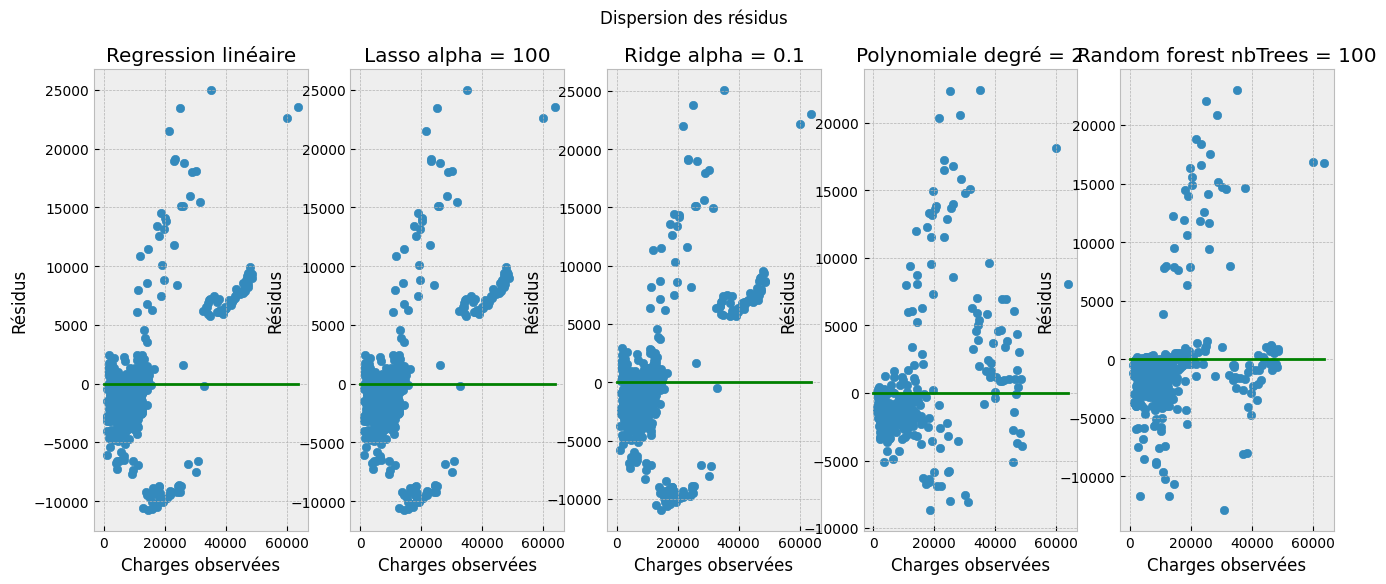

In [241]:
residusRegressionLineaire = y_test - predictionChargesRegressionLineaires
residusRegressionLasso = y_test - predictionChargesRegressionLineairesLasso
residusRegressionRidge = y_test - predictionChargesRegressionLineairesRidge
residusRegressionPolynomiale = y_test - predictionChargesRegressionPolynomiale
residusRegressionRandomForest = y_test - predictionChargesRegressionRandomForest

fig, axes = plt.subplots(1, 5, figsize=(16, 6)) # sp√©cifie la taille de la figure
axes[0].scatter(y_test, residusRegressionLineaire)
axes[0].set_xlabel("Charges observ√©es")
axes[0].set_ylabel("R√©sidus")
axes[0].set_title("Regression lin√©aire")
axes[0].plot([0, max(y_test)], [0, 0], color='g')

axes[1].scatter(y_test, residusRegressionLasso)
axes[1].set_xlabel("Charges observ√©es")
axes[1].set_ylabel("R√©sidus")
axes[1].set_title("Lasso alpha = {}".format(best_alpha_lasso))
axes[1].plot([0, max(y_test)], [0, 0], color='g')

axes[2].scatter(y_test, residusRegressionRidge)
axes[2].set_xlabel("Charges observ√©es")
axes[2].set_ylabel("R√©sidus")
axes[2].set_title("Ridge alpha = {}".format(best_alpha_ridge))
axes[2].plot([0, max(y_test)], [0, 0], color='g')

axes[3].scatter(y_test, residusRegressionPolynomiale)
axes[3].set_xlabel("Charges observ√©es")
axes[3].set_ylabel("R√©sidus")
axes[3].set_title("Polynomiale degr√© = {}".format(best_degree_polynomial_regression))
axes[3].plot([0, max(y_test)], [0, 0], color='g')

axes[4].scatter(y_test, residusRegressionRandomForest)
axes[4].set_xlabel("Charges observ√©es")
axes[4].set_ylabel("R√©sidus")
axes[4].set_title("Random forest nbTrees = {}".format(nbTrees))
axes[4].plot([0, max(y_test)], [0, 0], color='g')

fig.suptitle("Dispersion des r√©sidus")

On peut observer des valeurs de r√©sidus tr√®s importantes. A ce stade, on ne peut pas toutes les supprimer puisqu'on se rend compte qu'elles sont trop nombreuses. On voit particuli√®rement un groupe d'outliers autour des charges pr√©dites √† 30 000 euros, avec des r√©sidus de -10 000 euros, signifiant que notre mod√®le a surestim√© de 10 000 euros les charges, ce qui est tr√®s excessif. On peut aussi observer des valeurs d'extr√™mes sous-estimations d'environ 20 000 euros pour des pr√©dictions de 10 000 euros.

In [242]:
print("Moyenne des r√©sidus =>\n[regression lineaire] {} \n[regression Lasso alpha = {}] {}\n[regression Ridge alpha = {}] {} \n[regression Ridge polynome degr√© = {}] {}\n [regression Random forest nbTrees = {}] {}\n".format(
    statistics.mean(residusRegressionLineaire), best_alpha_lasso,statistics.mean(residusRegressionLasso), best_alpha_ridge, statistics.mean(residusRegressionRidge),best_degree_polynomial_regression, statistics.mean(residusRegressionPolynomiale), nbTrees, statistics.mean(residusRegressionRandomForest)))

print("Variance des r√©sidus =>\n[regression lineaire] {} \n[regression Lasso alpha = {}] {}\n[regression Ridge alpha = {}] {} \n[regression Ridge polynome degr√© = {}] {}\n [regression Random forest nbTrees = {}] {}\n".format(
    statistics.variance(residusRegressionLineaire), best_alpha_lasso, statistics.variance(residusRegressionLasso),best_alpha_ridge, statistics.variance(residusRegressionRidge), best_degree_polynomial_regression,  statistics.variance(residusRegressionPolynomiale), nbTrees, statistics.variance(residusRegressionRandomForest)))

Moyenne des r√©sidus =>
[regression lineaire] 127.19377315182047 
[regression Lasso alpha = 100] 127.19377315182047
[regression Ridge alpha = 0.1] 127.19377315182099 
[regression Ridge polynome degr√© = 2] 77.03769936352926
 [regression Random forest nbTrees = 100] -220.41145133000157

Variance des r√©sidus =>
[regression lineaire] 37153499.276002385 
[regression Lasso alpha = 100] 37153499.276002385
[regression Ridge alpha = 0.1] 37193564.37842146 
[regression Ridge polynome degr√© = 2] 22073846.00785773
 [regression Random forest nbTrees = 100] 23602172.738196064



Aussi, on voit que la variance des r√©sidus n'est pas homog√®ne.

Nous allons visualiser la distribution des erreurs de pr√©diction de notre mod√®le de r√©gression lin√©aire, c'est-√†-dire la diff√©rence entre les valeurs r√©elles de la variable cible (y_test) et les valeurs pr√©dites par le mod√®le (predictionChargesRegressionLineaires).
Si l'histogramme des √©carts obtenus est centr√© autour de z√©ro et suit une distribution normale, cela signifie que les erreurs de pr√©diction sont faibles et que notre mod√®le est capable de faire des pr√©dictions pr√©cises. En revanche, si l'histogramme pr√©sente une distribution asym√©trique ou est centr√© autour d'une valeur non nulle, cela peut indiquer la pr√©sence de biais ou d'erreurs syst√©matiques dans notre mod√®le.

Text(0.5, 0.98, 'R√©partition des r√©sidus')

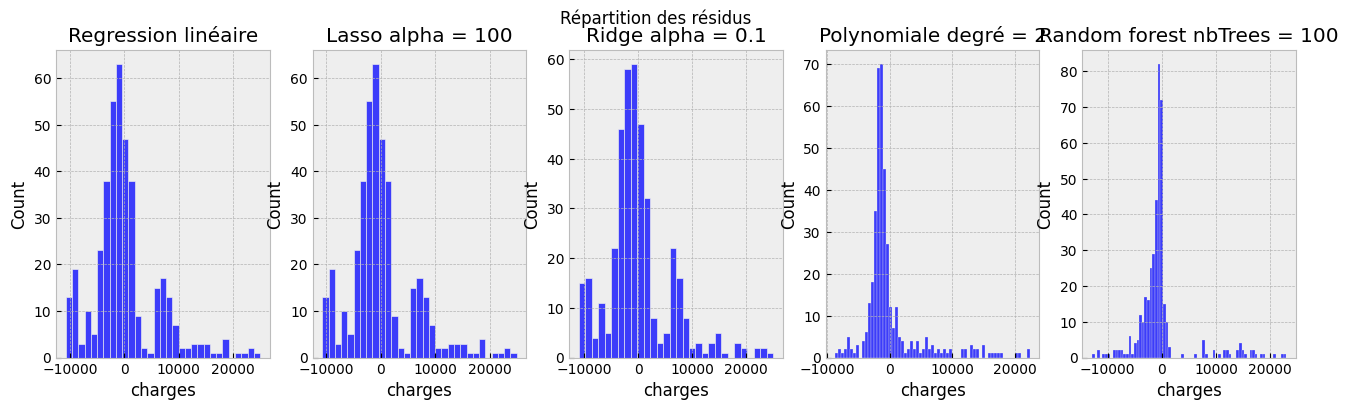

In [243]:
fig, axes = plt.subplots(1, 5, figsize=(16, 4)) # sp√©cifie la taille de la figure

# Tracer l'histogramme pour la r√©gression lin√©aire
sns.histplot(residusRegressionLineaire, color='blue', ax=axes[0])
axes[0].set_title("Regression lin√©aire")

# Tracer l'histogramme pour la r√©gression Lasso
sns.histplot(residusRegressionLasso, color='blue', ax=axes[1])
axes[1].set_title("Lasso alpha = {}".format(best_alpha_lasso))

# Tracer l'histogramme pour la r√©gression Ridge
sns.histplot(residusRegressionRidge, color='blue', ax=axes[2])
axes[2].set_title("Ridge alpha = {}".format(best_alpha_ridge))

# Tracer l'histogramme pour la r√©gression Polynomiale
sns.histplot(residusRegressionPolynomiale, color='blue', ax=axes[3])
axes[3].set_title("Polynomiale degr√© = {}".format(best_degree_polynomial_regression))

# Tracer l'histogramme pour la r√©gression Random forest
sns.histplot(residusRegressionRandomForest, color='blue', ax=axes[4])
axes[4].set_title("Random forest nbTrees = {}".format(nbTrees))

plt.suptitle("R√©partition des r√©sidus")

Text(0.5, 0.98, 'Mise en parall√®le des valeurs pr√©dites et observ√©es')

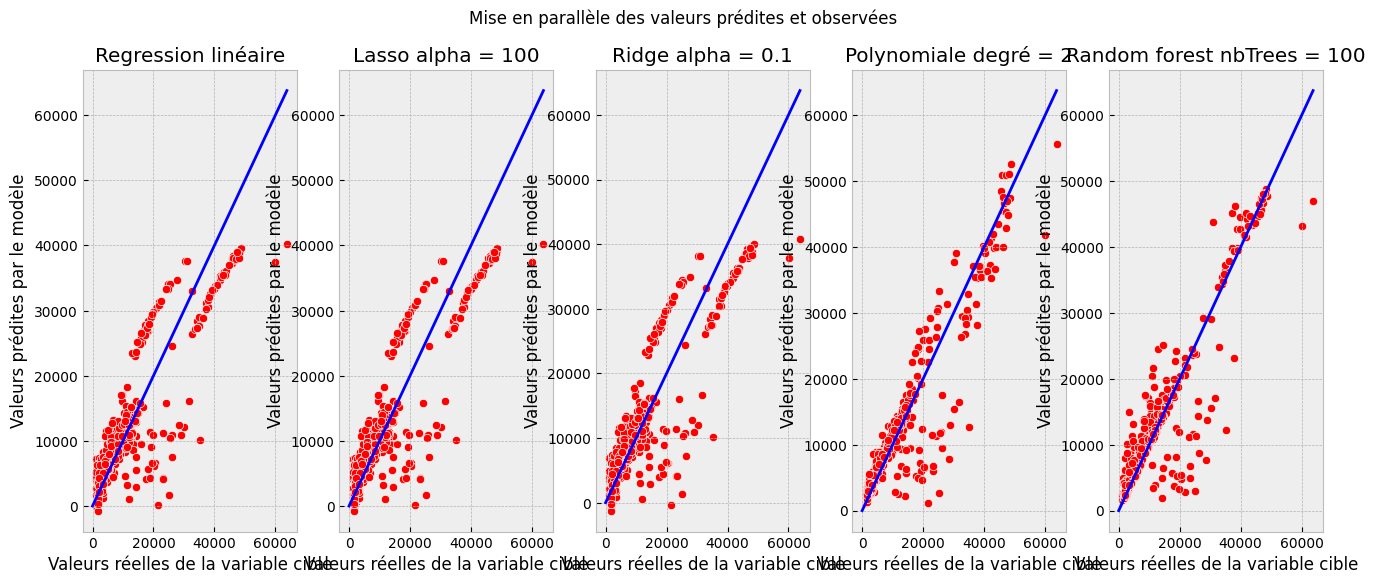

In [244]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6)) # sp√©cifie la taille de la figure
sns.scatterplot(ax=axes[0], x=y_test, y=predictionChargesRegressionLineaires, color='r')
axes[0].set_xlabel("Valeurs r√©elles de la variable cible")
axes[0].set_ylabel("Valeurs pr√©dites par le mod√®le")
axes[0].set_title("Regression lin√©aire")
axes[0].plot([0, max(y_test)], [0, max(y_test)], color='b')

sns.scatterplot(ax=axes[1], x=y_test, y=predictionChargesRegressionLineairesLasso, color='r')
axes[1].set_xlabel("Valeurs r√©elles de la variable cible")
axes[1].set_ylabel("Valeurs pr√©dites par le mod√®le")
axes[1].set_title("Lasso alpha = {}".format(best_alpha_lasso))
axes[1].plot([0, max(y_test)], [0, max(y_test)], color='b')

sns.scatterplot(ax=axes[2], x=y_test, y=predictionChargesRegressionLineairesRidge, color='r')
axes[2].set_xlabel("Valeurs r√©elles de la variable cible")
axes[2].set_ylabel("Valeurs pr√©dites par le mod√®le")
axes[2].set_title("Ridge alpha = {}".format(best_alpha_ridge))
axes[2].plot([0, max(y_test)], [0, max(y_test)], color='b')

sns.scatterplot(ax=axes[3], x=y_test, y=predictionChargesRegressionPolynomiale, color='r')
axes[3].set_xlabel("Valeurs r√©elles de la variable cible")
axes[3].set_ylabel("Valeurs pr√©dites par le mod√®le")
axes[3].set_title("Polynomiale degr√© = {}".format(best_degree_polynomial_regression))
axes[3].plot([0, max(y_test)], [0, max(y_test)], color='b')


sns.scatterplot(ax=axes[4], x=y_test, y=predictionChargesRegressionRandomForest, color='r')
axes[4].set_xlabel("Valeurs r√©elles de la variable cible")
axes[4].set_ylabel("Valeurs pr√©dites par le mod√®le")
axes[4].set_title("Random forest nbTrees = {}".format(nbTrees))
axes[4].plot([0, max(y_test)], [0, max(y_test)], color='b')
plt.suptitle("Mise en parall√®le des valeurs pr√©dites et observ√©es")

Text(0.5, 1.0, 'nbTrees = 100')

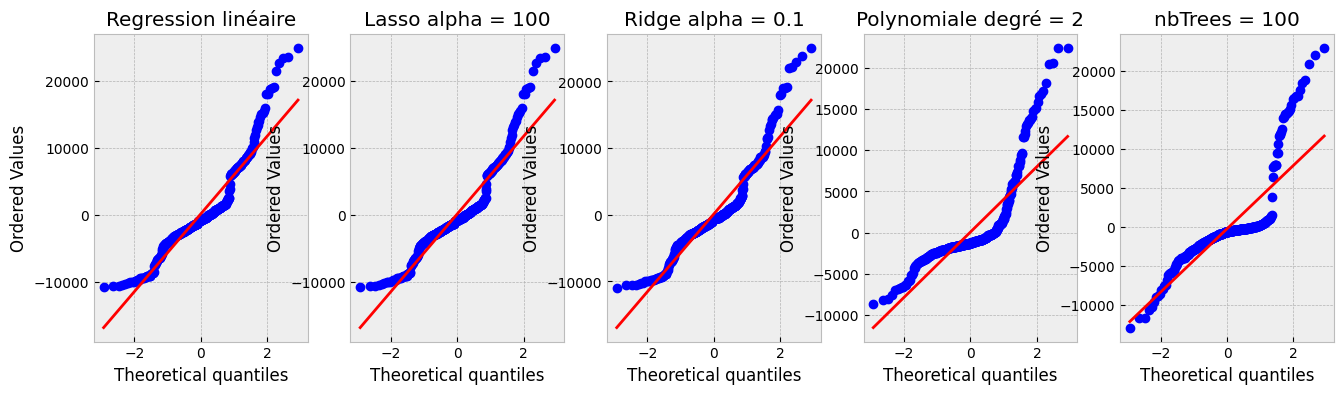

In [245]:
fig, axes = plt.subplots(1, 5, figsize=(16,4)) # sp√©cifie la taille de la figure

# Tracer le graphique de probabilit√© normale pour la r√©gression lin√©aire
_, (_, _, r) = sp.stats.probplot(residusRegressionLineaire, fit=True, plot=axes[0])
axes[0].set_title('Regression lin√©aire')

# Tracer le graphique de probabilit√© normale pour la r√©gression lin√©aire Lasso
_, (_, _, r) = sp.stats.probplot(residusRegressionLasso, fit=True, plot=axes[1])
axes[1].set_title("Lasso alpha = {}".format(best_alpha_lasso))

# Tracer le graphique de probabilit√© normale pour la r√©gression lin√©aire Ridge
_, (_, _, r) = sp.stats.probplot(residusRegressionRidge, fit=True, plot=axes[2])
axes[2].set_title("Ridge alpha = {}".format(best_alpha_ridge))

# Tracer le graphique de probabilit√© normale pour la r√©gression lin√©aire polynomiale
_, (_, _, r) = sp.stats.probplot(residusRegressionPolynomiale, fit=True, plot=axes[3])
axes[3].set_title("Polynomiale degr√© = {}".format(best_degree_polynomial_regression))

# Tracer le graphique de probabilit√© normale pour la r√©gression Random forest
_, (_, _, r) = sp.stats.probplot(residusRegressionRandomForest, fit=True, plot=axes[4])
axes[4].set_title("nbTrees = {}".format(nbTrees))

#### Homost√©dasticit√©

Text(0.5, 1.0, 'Polynomiale degr√© = 100')

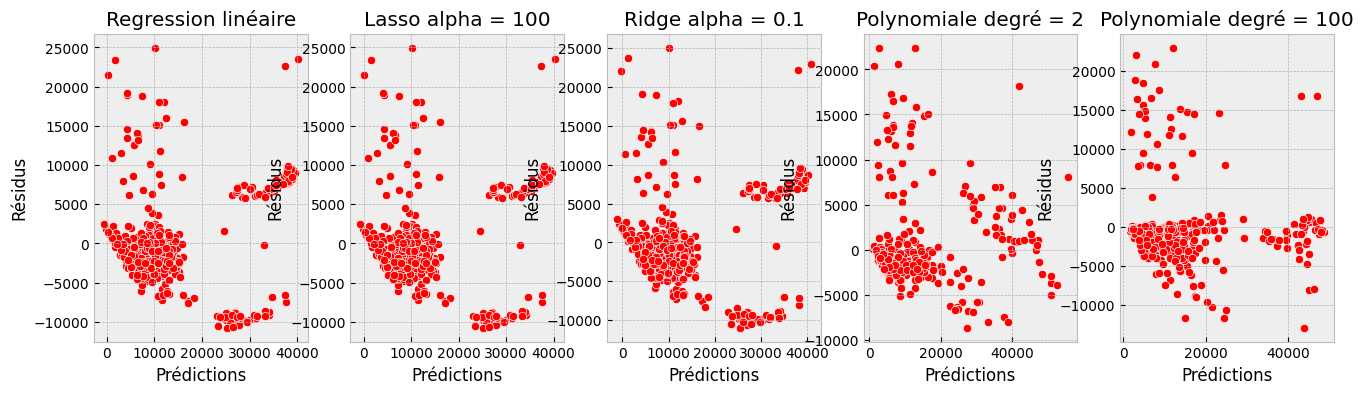

In [246]:
fig, axes = plt.subplots(1, 5, figsize=(16,4)) # sp√©cifie la taille de la figure

# Tracer la dispersion des r√©sidus pour la r√©gression lin√©aire
sns.scatterplot(y=residusRegressionLineaire, x=predictionChargesRegressionLineaires, color='r', ax=axes[0])
axes[0].set_xlabel("Pr√©dictions")
axes[0].set_ylabel("R√©sidus")
axes[0].set_title("Regression lin√©aire")

# Tracer la dispersion des r√©sidus pour la r√©gression lin√©aire Lasso
sns.scatterplot(y=residusRegressionLasso, x=predictionChargesRegressionLineairesLasso, color='r', ax=axes[1])
axes[1].set_xlabel("Pr√©dictions")
axes[1].set_ylabel("R√©sidus")
axes[1].set_title("Lasso alpha = {}".format(best_alpha_lasso))

# Tracer la dispersion des r√©sidus pour la r√©gression lin√©aire Ridge
sns.scatterplot(y=residusRegressionRidge, x=predictionChargesRegressionLineairesRidge, color='r', ax=axes[2])
axes[2].set_xlabel("Pr√©dictions")
axes[2].set_ylabel("R√©sidus")
axes[2].set_title("Ridge alpha = {}".format(best_alpha_ridge))

# Tracer la dispersion des r√©sidus pour la r√©gression lin√©aire polynomiale
sns.scatterplot(y=residusRegressionPolynomiale, x=predictionChargesRegressionPolynomiale, color='r', ax=axes[3])
axes[3].set_xlabel("Pr√©dictions")
axes[3].set_ylabel("R√©sidus")
axes[3].set_title("Polynomiale degr√© = {}".format(best_degree_polynomial_regression))

# Tracer la dispersion des r√©sidus pour la r√©gression lin√©aire polynomiale
sns.scatterplot(y=residusRegressionRandomForest, x=predictionChargesRegressionRandomForest, color='r', ax=axes[4])
axes[4].set_xlabel("Pr√©dictions")
axes[4].set_ylabel("R√©sidus")
axes[4].set_title("Polynomiale degr√© = {}".format(nbTrees))

On peut conclure que le mod√®le de r√©gression lin√©naire Lasso n'a pas am√©lior√© la pr√©diction du jeu de tests par rapport au mod√®le de r√©gression lin√©aire. Nous allons donc maintenant passder √† un autre mod√®le : le mod√®le de r√©gression lin√©aire Ridge, et l'√©valuer quantitativement et qualitativement par rapport √† la r√©gression lin√©aire Lasso, qui a tout de m√™me un tout petit peu r√©duit les valeurs des coefficients Beta, en minimisant leur norme 2 avec un alpha √©gal √† 1.